<a href="https://colab.research.google.com/github/Mumo2001/Data-/blob/main/KWANZA_TUKULE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUSINESS UNDERSTANDING.**

In a competitive marketplace, understanding sales performance and customer behavior is critical for maintaining profitability and achieving sustainable growth. Businesses must continuously assess their operations, refine strategies, and leverage data-driven insights to enhance decision-making.

The dataset provided offers valuable information on various aspects of sales, including transaction details, product categories, pricing, quantity sold, locations, and business identifiers. By analyzing these factors, businesses can gain deeper insights into: Sales Trends,
Market Dynamics,
Operational Efficiency and
Competitive Positioning By levergaing machine learning techniques, businesses can forecast future sales, adjust pricing strategies, and enhance customer engagement. Ultimately, the goal is to improve operational efficiency, maximize revenue, and sustain long-term growth in an ever-evolving market.

**Business Problem Statement**

The businesses facae challenges in managing and analyzing sales data to drive strategic business decisions. Key issues include identifying and resolving data quality problems, understanding sales trends, optimizing product and customer engagement strategies, and improving operational efficiency. Without a comprehensive analysis of sales performance, customer behavior, and seasonal trends, the businesses risk inefficiencies in inventory management, lost revenue opportunities, and reduced customer retention.

This project aims to provide actionable insights through advanced statistical techniques and strategic recommendations to enhance sales performance, customer engagement, and operational decision-making.

**Objectives.**

**Boosting Revenue**: By identifying the products and customer segments that generate the highest value, the business can focus resources on the most lucrative areas and refine marketing strategies for better returns.

**Improving Customer Relationships**: Maintaining loyal customers and reconnecting with those who have decreased their purchase frequency is vital for ensuring long-term profitability and stability.

**Optimizing Operations**: Efficient inventory control and supply chain management are crucial for handling seasonal demand, cutting costs, and avoiding issues like understocking or overstocking.

**Insight-Driven Decision Making**: Utilizing insights from sales patterns, customer segmentation, and forecasting to drive strategic decisions in marketing, sales planning, and operational efficiency.

**DATA UNDERSTANDING**

We  first import the dataset we will use for analysis.

In [2]:
#we import all the libraries we will use for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore


In [3]:

data = pd.read_csv("/content/sales data.csv")
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [4]:
#Viewing the last 5 rows
data.tail()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
333400,"January 9, 2024, 8:49 PM",Category-119,Product-e98d,Business-f9ff,Location-1979,1,"1,770"
333401,"August 20, 2024, 8:24 PM",Category-106,Product-21f4,Business-72bc,Location-689f,1,850
333402,"August 20, 2024, 8:24 PM",Category-76,Product-6e9c,Business-72bc,Location-689f,1,"2,575"
333403,"October 10, 2024, 6:19 PM",Category-91,Product-523e,Business-2693,Location-b27b,1,"1,520"
333404,"October 10, 2024, 6:19 PM",Category-75,Product-b31e,Business-2693,Location-b27b,1,"4,420"


In [5]:
data.shape

(333405, 7)

This project involves understanding the anonymized sales dataset with 7 columns and 333405 rows.
We can now preview the columns.

In [6]:
data.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


**DATA CLEANING.**

We check for missing values, inconsistent data types amd duplicated values.



In [8]:
#we create a copy of the dataset to avoid data loss.
df = data.copy()

In [9]:
#Checking for duplicated values.
data.duplicated().sum()

3524

In [10]:
#Drop the duplicated values
data_1 = data.drop_duplicates()
data_1.duplicated().sum()

0

In [11]:
#Checking for missing values.
data_1.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,8


In [12]:
#Drop the missing values
data_1.dropna(inplace = True)
data_1.isnull().sum()

<ipython-input-12-793f8e2e5bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.dropna(inplace = True)


,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,0


In [13]:
data_1.shape

(329873, 7)

We have found 3524 duplicated values. We dropped them to eliminate redundant data. The missing values were 8 in the data set. 8 is a small number so we dropped them since it will not have a significant change in the analysis of the dataset.
We now change the 'UNIT PRICE' column data type to integer format.




In [14]:
#change the 'UNIT PRICE' column from object to integer data type.
data_1['UNIT PRICE'] = data_1['UNIT PRICE'].astype(str).str.replace(',', '').astype('int')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329873 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 329873 non-null  object
 1   ANONYMIZED CATEGORY  329873 non-null  object
 2   ANONYMIZED PRODUCT   329873 non-null  object
 3   ANONYMIZED BUSINESS  329873 non-null  object
 4   ANONYMIZED LOCATION  329873 non-null  object
 5   QUANTITY             329873 non-null  int64 
 6   UNIT PRICE           329873 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 20.1+ MB


<ipython-input-14-3f73c2e7119c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['UNIT PRICE'] = data_1['UNIT PRICE'].astype(str).str.replace(',', '').astype('int')


Let's check for the outliers on the numerical columns. We will visualize the data to see its distribution. We will then handle the outliers as they will affect the model's performance.

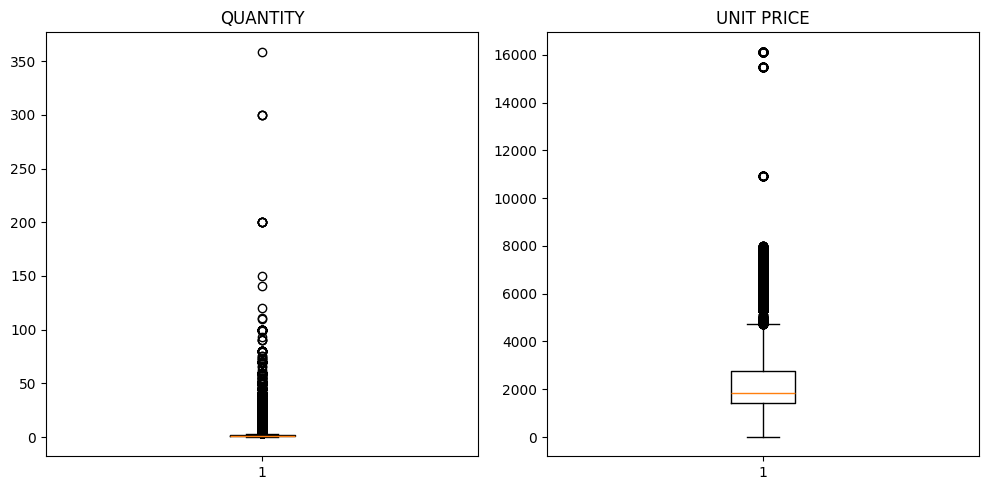

In [15]:
numeric_columns = data_1.select_dtypes(include=['int64'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
#We use the z-score method to identify the rows with outliers.


# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data_1.select_dtypes(include=[np.number])))

# Set threshold for Z-scores
threshold = 3

# Identify rows with any Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Print the identified outliers
print("Outliers detected using Z-score:")
print(data_1[outliers])

Outliers detected using Z-score:
                              DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
40       November 3, 2024, 3:58 PM        Category-120       Product-d53e   
72      November 18, 2024, 8:29 PM        Category-100       Product-1398   
83           June 5, 2024, 1:31 PM         Category-75       Product-8f75   
108       January 7, 2024, 7:31 PM         Category-76       Product-e805   
131          May 21, 2024, 4:37 PM         Category-96       Product-41c3   
...                            ...                 ...                ...   
333181    January 7, 2024, 4:19 PM        Category-120       Product-3050   
333182    January 7, 2024, 4:19 PM        Category-120       Product-4156   
333200   January 15, 2024, 9:13 PM         Category-76       Product-e805   
333224       May 24, 2024, 4:15 PM        Category-119       Product-66e0   
333333   January 28, 2024, 5:29 PM         Category-76       Product-e805   

       ANONYMIZED BUSINESS ANONYMIZED LOCA

In [17]:
#Removing the outliers.
data_2 = data_1[~outliers]

print("DataFrame after removing outliers:")
print(data_2)

DataFrame after removing outliers:
                              DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0         August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1         August 18, 2024, 9:32 PM        Category-120       Product-4156   
2         August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3         August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4         August 18, 2024, 9:32 PM        Category-119       Product-66e0   
...                            ...                 ...                ...   
333398  November 13, 2024, 1:59 PM        Category-121       Product-898d   
333401    August 20, 2024, 8:24 PM        Category-106       Product-21f4   
333402    August 20, 2024, 8:24 PM         Category-76       Product-6e9c   
333403   October 10, 2024, 6:19 PM         Category-91       Product-523e   
333404   October 10, 2024, 6:19 PM         Category-75       Product-b31e   

       ANONYMIZED BUSINESS ANONYMIZED LO

After emoving the outliers we remain with 321897 rows.

**Feature Engineering**

We create a new column "Month-Year"

In [18]:
data_2.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,1910
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480


In [19]:
#convert date column to datetime type
data_2['DATE'] = pd.to_datetime(data_2['DATE'])
#create a new column 'MONTH-YEAR' from the date column.e.g 'August 2024'
data_2['MONTH-YEAR'] = data_2['DATE'].dt.strftime('%b-%Y')

<ipython-input-19-0c605a2e6f6e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2['DATE'] = pd.to_datetime(data_2['DATE'])
<ipython-input-19-0c605a2e6f6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['DATE'] = pd.to_datetime(data_2['DATE'])
<ipython-input-19-0c605a2e6f6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['MONTH-YEAR'] = data_2['DA

In [20]:
#create a new column 'TOTAL PRICE' which is the value for the
#quantity multiplied by the unit price
data_2['TOTAL PRICE'] = data_2['QUANTITY'] * data_2['UNIT PRICE']

<ipython-input-20-88529f222c14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['TOTAL PRICE'] = data_2['QUANTITY'] * data_2['UNIT PRICE']


In [21]:
data_2.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,TOTAL PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,Aug-2024,850
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,Aug-2024,3820
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670,Aug-2024,3670
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605,Aug-2024,2605
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480,Aug-2024,7400


**EXPLORATORY DATA ANALYSIS**

Let's view the statistical overview ot the data.

In [22]:
data_2.describe()

,DATE,QUANTITY,UNIT PRICE,TOTAL PRICE
count,321978,321978.000000,321978.000000,321978.000000
mean,2024-07-20 04:08:25.246445312,2.002568,2269.187994,4542.354524
min,2024-01-01 05:54:00,0.000000,0.000000,0.000000
25%,2024-05-02 19:19:00,1.000000,1415.000000,1520.000000
50%,2024-07-30 19:38:00,1.000000,1830.000000,2675.000000
75%,2024-10-15 14:14:00,2.000000,2710.000000,5380.000000
max,2024-12-31 18:24:00,13.000000,7060.000000,84216.000000
std,NaN,1.892884,1497.522109,5642.905249


**Sales Overview.**

Total Quantity and Value grouped by: anonymized category and anonymized business. We'll use SQL.

In [23]:
#connect sqlite it to database
conn = sqlite3.Connection('data.sqlite')
#load the dataframe into a table in the database
data_2.to_sql('data_2', conn, if_exists='replace', index=False)


321978

In [24]:
q = """
SELECT "ANONYMIZED CATEGORY", COUNT(*) AS COUNT,
SUM(QUANTITY) AS TOTAL_QUANTITY, SUM("TOTAL PRICE") AS TOTAL_VALUE
FROM data_2
GROUP BY "ANONYMIZED CATEGORY"
;
"""
category = pd.read_sql(q, conn)
category_sorted = category.sort_values(by=['TOTAL_VALUE', 'TOTAL_QUANTITY'], ascending= False)
category_sorted


,ANONYMIZED CATEGORY,COUNT,TOTAL_QUANTITY,TOTAL_VALUE
25,Category-75,46377,119488,434525515
26,Category-76,38610,62479,287303650
18,Category-120,59974,144594,272085748
17,Category-119,31278,60707,91992304
0,Category-100,17637,48334,82091798
27,Category-77,13443,25373,68089187
38,Category-91,15880,20563,43330773
34,Category-85,12942,21177,31293848
1,Category-101,6504,16934,30838882
19,Category-121,7186,12629,19676658


In [25]:

q = """
SELECT "ANONYMIZED BUSINESS", COUNT(*) AS COUNT,
SUM(QUANTITY) AS TOTAL_QUANTITY, SUM("TOTAL PRICE") AS TOTAL_VALUE
FROM data_2
GROUP BY "ANONYMIZED BUSINESS"
;
"""
business= pd.read_sql(q, conn)
business_sorted = business.sort_values(by=['TOTAL_VALUE', 'TOTAL_QUANTITY'], ascending=False)
business_sorted.head(20)


,ANONYMIZED BUSINESS,COUNT,TOTAL_QUANTITY,TOTAL_VALUE
2889,Business-978e,2452,10130,19316423
1865,Business-6068,1369,6595,13864075
142,Business-07de,1043,4353,11832053
4752,Business-fe7d,457,2794,11388451
2341,Business-7a03,1045,4621,11037476
4289,Business-e672,858,3177,10276380
4558,Business-f4f4,1067,3287,9621406
1666,Business-5613,626,3027,8875932
4028,Business-d72e,946,3581,8813916
3514,Business-ba13,598,2998,8343266


In [26]:
#group by both anonymized  category and anonymized business.
q = """
SELECT "ANONYMIZED CATEGORY", "ANONYMIZED BUSINESS", COUNT(*) AS COUNT,
SUM(QUANTITY) AS TOTAL_QUANTITY, SUM("TOTAL PRICE") AS TOTAL_VALUE
FROM data_2
GROUP BY "ANONYMIZED CATEGORY", "ANONYMIZED BUSINESS"
;
"""
category_business = pd.read_sql(q, conn)
category_business.sorted = category_business.sort_values(by=['TOTAL_VALUE', 'TOTAL_QUANTITY'], ascending=False)
category_business.sorted.head(20)

<ipython-input-26-118860af681f>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  category_business.sorted = category_business.sort_values(by=['TOTAL_VALUE', 'TOTAL_QUANTITY'], ascending=False)


,ANONYMIZED CATEGORY,ANONYMIZED BUSINESS,COUNT,TOTAL_QUANTITY,TOTAL_VALUE
17282,Category-75,Business-978e,322,2370,7687430
21192,Category-76,Business-fe7d,195,1141,6803087
15567,Category-75,Business-07de,255,1974,6461920
1051,Category-100,Business-978e,882,3585,6193673
20918,Category-76,Business-e672,284,712,4231707
16619,Category-75,Business-6068,240,1099,3891420
12119,Category-120,Business-6068,353,1954,3564744
18326,Category-75,Business-f4f4,119,819,3405130
15782,Category-75,Business-1ae8,158,800,3358325
15932,Category-75,Business-260e,243,999,3194854


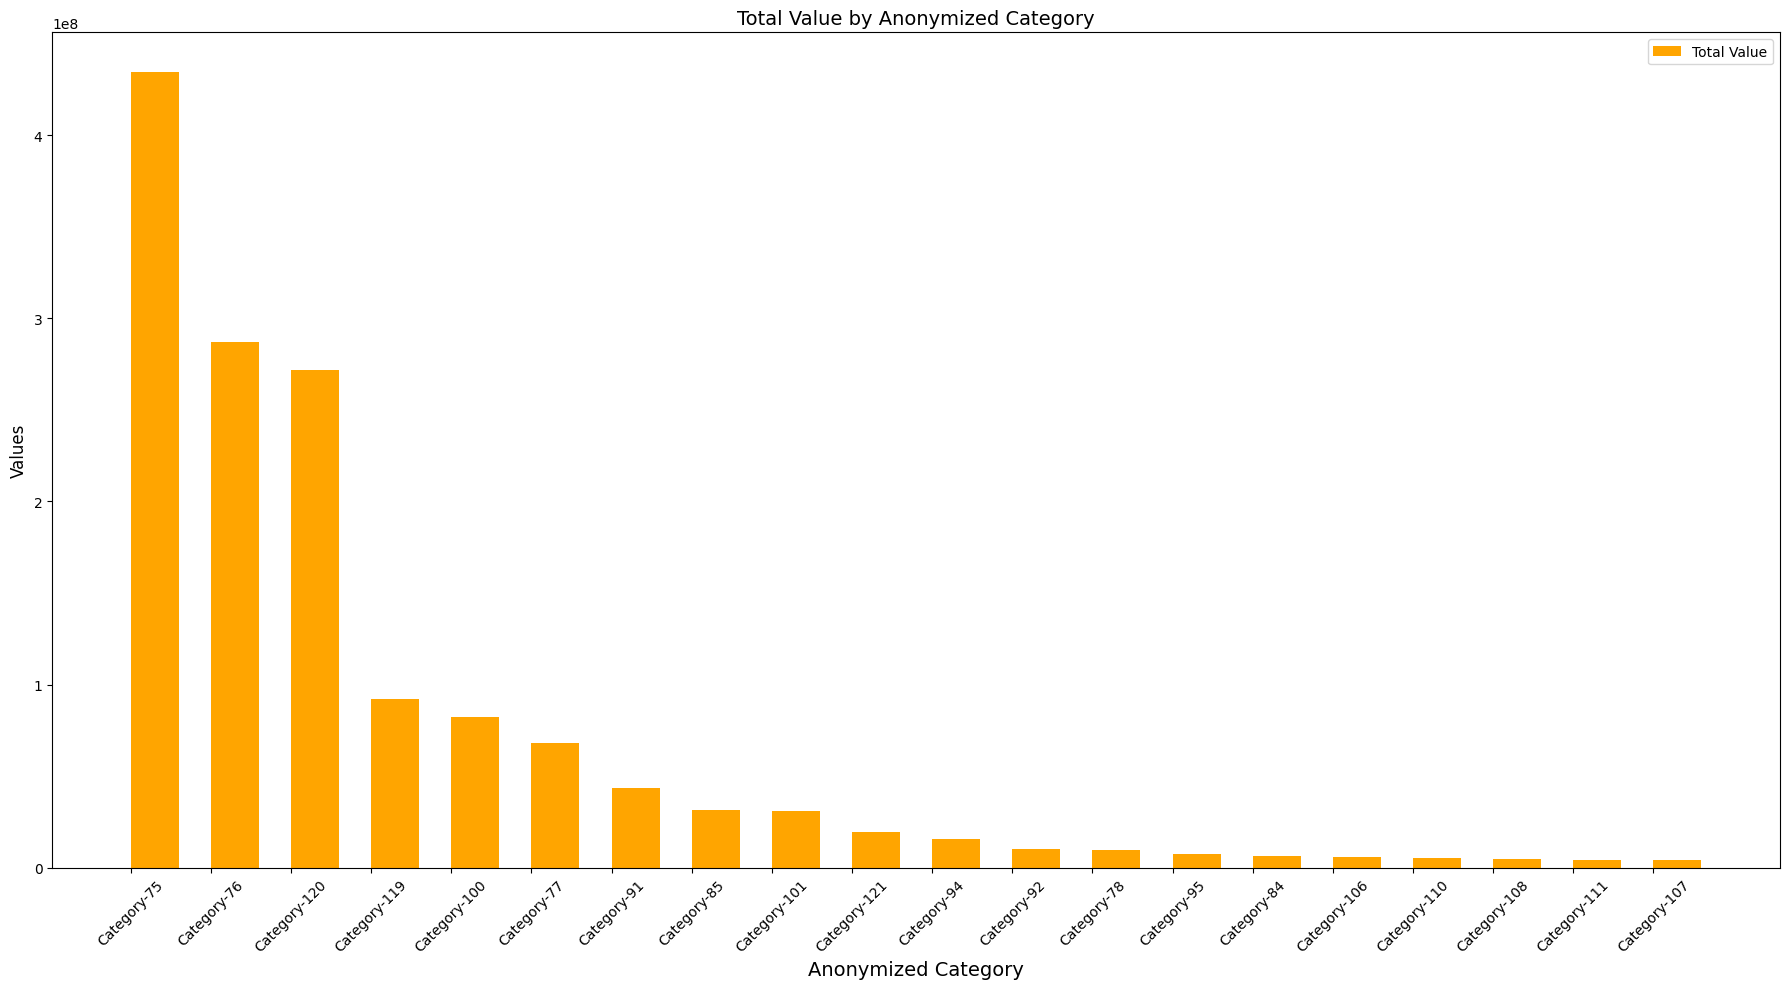

In [27]:
#visualize the above codes
#Bar chart total value grouped by anonymized category.

# Set figure size
plt.figure(figsize=(18, 10))

# Set bar width for grouped bars
bar_width = 0.6
categories = category_sorted.head(20)["ANONYMIZED CATEGORY"]
x = np.arange(len(categories))

#Plot Total Quantity
#plt.bar(x - bar_width/2, category_sorted.head(20)["TOTAL_QUANTITY"], width=bar_width, label="Total Quantity", color='skyblue')

# Plot Total Value
plt.bar(x + bar_width/2, category_sorted.head(20)["TOTAL_VALUE"], width=bar_width, label="Total Value", color='orange')

# Add labels and titles
plt.title("Total Value by Anonymized Category", fontsize=14)
plt.xlabel("Anonymized Category", fontsize=14)
plt.ylabel("Values", fontsize=12)
plt.xticks(x, categories, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()

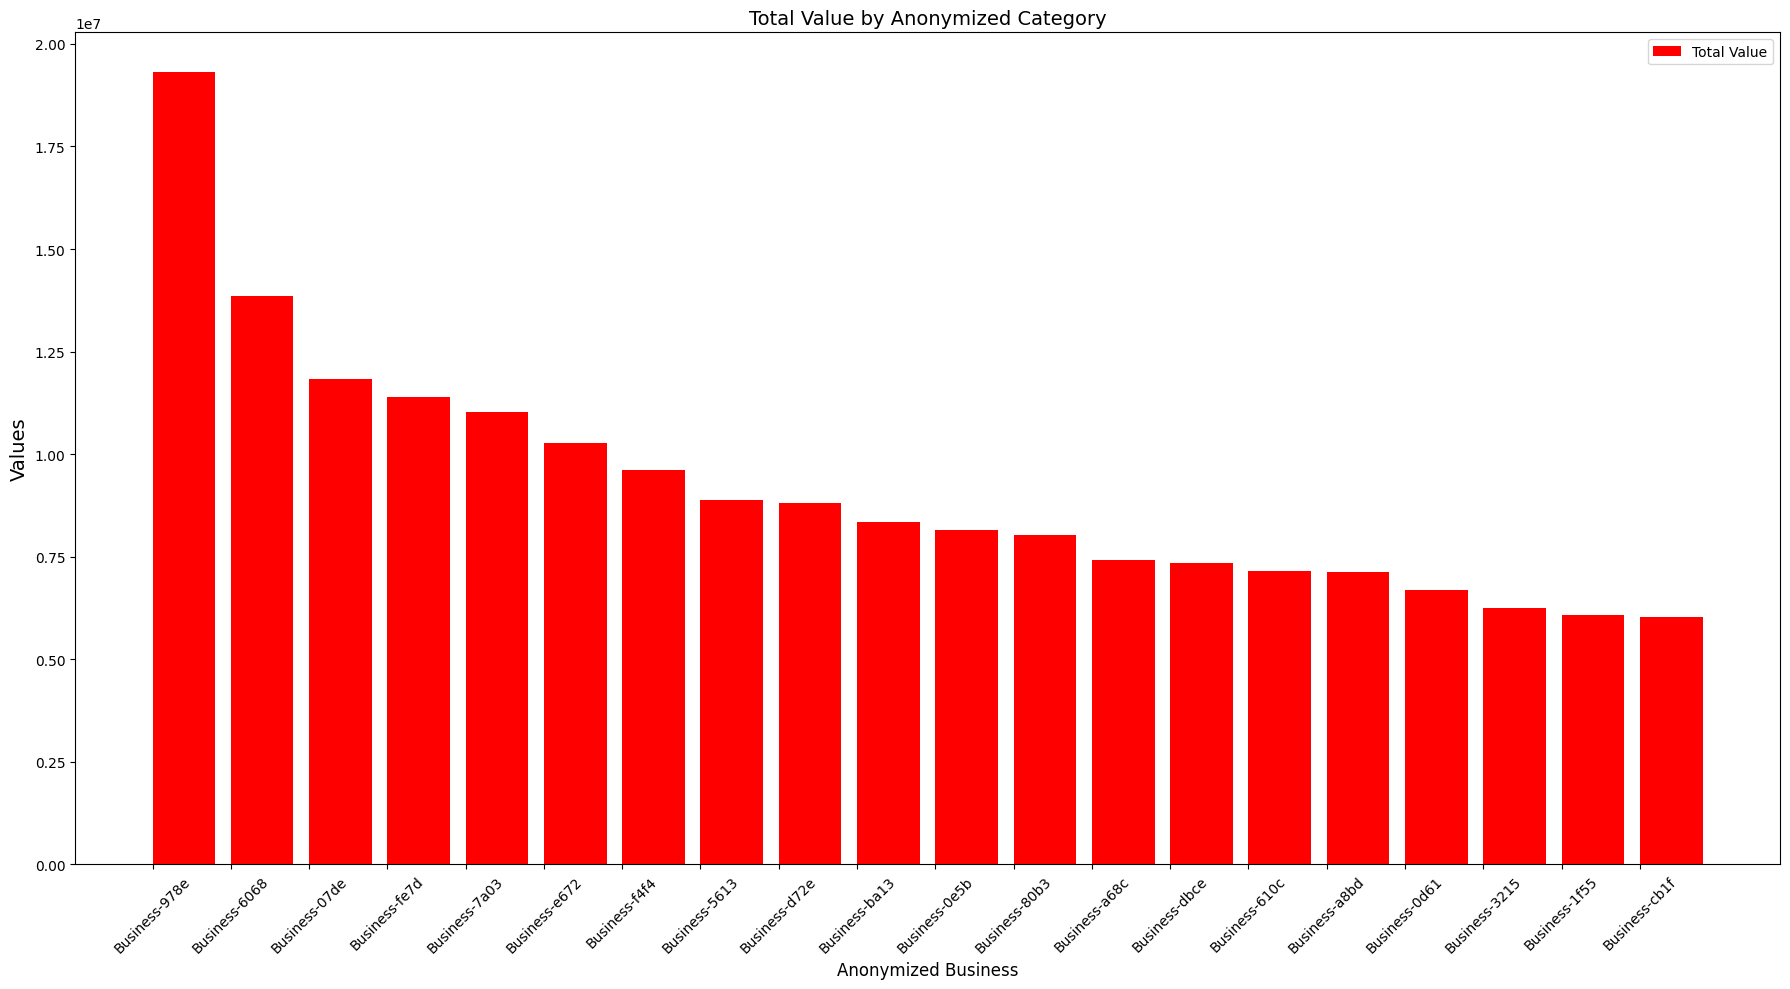

In [28]:
#visualize the above codes
#Bar chart total value grouped by anonymized business.
# Set figure size
plt.figure(figsize=(18, 10))

# Set bar width for grouped bars
bar_width = 0.8
categories = business_sorted.head(20)["ANONYMIZED BUSINESS"]
x = np.arange(len(categories))

# Plot Total Quantity
#plt.bar(x - bar_width/2, business_sorted.head(20)["TOTAL_QUANTITY"], width=bar_width, label="Total Quantity", color='skyblue')

# Plot Total Value
plt.bar(x + bar_width/2, business_sorted.head(20)["TOTAL_VALUE"], width=bar_width, label="Total Value", color='red')

# Add labels and titles
plt.title("Total Value by Anonymized Category", fontsize=14)
plt.xlabel("Anonymized Business", fontsize=12)
plt.ylabel("Values", fontsize=14)
plt.xticks(x, categories, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()

We plotted the top 20 anonymized categories and anonymized business based on the total value. Category 75 and Business -978e have the highest values in sales.

  MONTH-YEAR  Total_Quantity  Total_Value
0 2024-04-01           42432    101876543
1 2024-08-01           59187    125240059
2 2024-12-01           49001     95781195
3 2024-02-01           36340    101816962
4 2024-01-01           47770    113256025


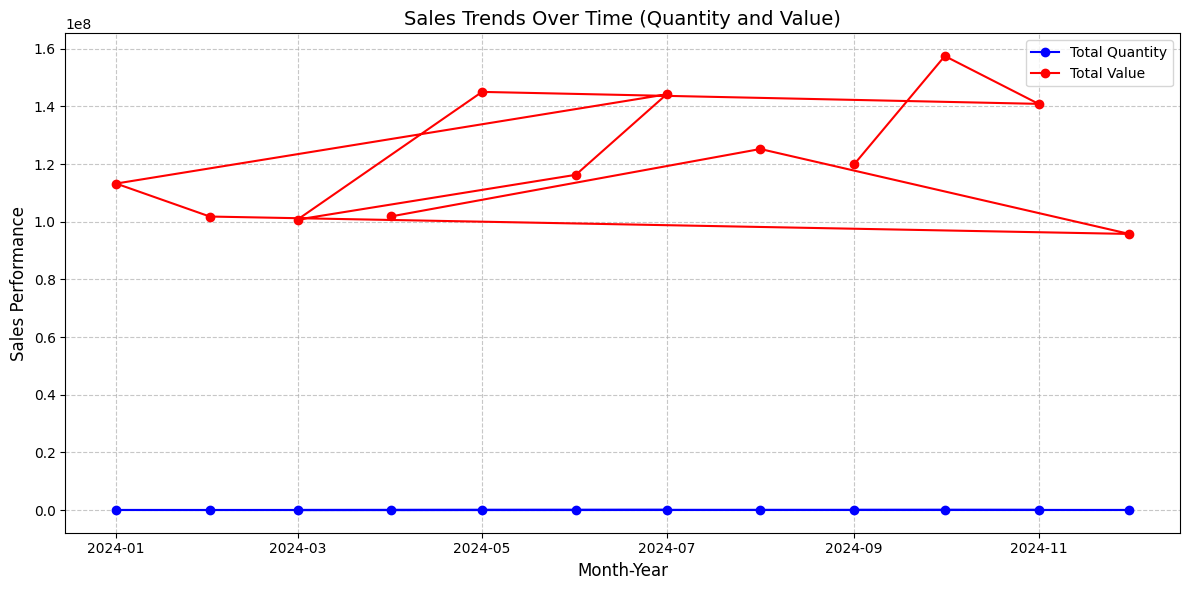

In [29]:
#Analyze sales trends (Quantity and value) by month-year.
# Group by Month-Year and calculate Total Quantity and Total Value
sales_trends = data_2.groupby('MONTH-YEAR').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL PRICE', 'sum')
).reset_index()

# Convert Month-Year back to datetime for proper plotting
sales_trends['MONTH-YEAR'] = pd.to_datetime(sales_trends['MONTH-YEAR'], format='%b-%Y')

# Display the first few rows of the aggregated data.
print(sales_trends.head())

# Plot: Total Quantity and Total Value over time
plt.figure(figsize=(12, 6))

# Plot Total Quantity
plt.plot(sales_trends['MONTH-YEAR'], sales_trends['Total_Quantity'], label='Total Quantity', marker='o', linestyle='-', color='blue')

# Plot Total Value
plt.plot(sales_trends['MONTH-YEAR'], sales_trends['Total_Value'], label='Total Value', marker='o', linestyle='-', color='red')

# Add titles and labels
plt.title("Sales Trends Over Time (Quantity and Value)", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Sales Performance", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Total Value (Red Line):

The total sales value exhibits an upward trend overall, with some fluctuations.
Some months have sharp increases, suggesting peak sales periods.
A noticeable drop appears towards the end of the year.

Total Quantity (Blue Line):

The quantity of items sold remains relatively low and stable throughout the period. The lowest quantity is 0 while the highest quantity is 13 from the describe function above.
Unlike total value, the total quantity does not exhibit significant spikes or dips.

Possible Explanations.

The discrepancy between Total Quantity and Total Value suggests that:

Higher-value products may be contributing significantly to total revenue.
Price changes or sales of expensive items in some months could explain sudden increases in value.
The spike in Total Value around September-October 2024 might indicate seasonal demand (e.g., promotions and large bulk purchases from certain customers.)

The decline in Total Value towards November 2024 might suggest decreased customer demand or a potential off-season period in sales.

In [30]:
data_2.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,TOTAL PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,Aug-2024,850
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,Aug-2024,3820
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670,Aug-2024,3670
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605,Aug-2024,2605
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480,Aug-2024,7400


In [31]:
#top 5 most frequently purchased products based on quantity and value.
top_5_products_quantity = data_2.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().nlargest(5)
top_5_products_value = data_2.groupby('ANONYMIZED PRODUCT')['TOTAL PRICE'].sum().nlargest(5)

In [32]:
top_5_products_quantity

,QUANTITY
ANONYMIZED PRODUCT,
Product-66e0,40340
Product-e805,35389
Product-8f75,32415
Product-4156,25804
Product-29ee,25698


In [33]:
top_5_products_value

,TOTAL PRICE
ANONYMIZED PRODUCT,
Product-e805,212666698
Product-8f75,137121970
Product-66e0,60803875
Product-4156,51481772
Product-29ee,48750814


The top 5 products frequently purchased based on quantity and value are Product-66e0,e-805,8f75,4156,29ee. Since these are most valuable products, businesses are required to strategize in because of the competition; increase inventory,implement target marketing to attract more customers or create personalized offers to retain their customers.

In [34]:
#customer segmentation.
customer_segmentation = data_2.groupby("ANONYMIZED BUSINESS").agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL PRICE', 'sum'),
    Transaction_Frequency=('ANONYMIZED BUSINESS', 'count')
).reset_index()



In [35]:
# Define thresholds based on quantiles
customer_segmentation['Segment'] = pd.qcut(
    customer_segmentation['Total_Value'],
    q=3,
    labels=["Low Value", "Medium Value", "High Value"]
)

customer_segmentation.tail()


,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency,Segment
4766,Business-ffa9,3,6740,3,Low Value
4767,Business-ffae,6,10530,5,Low Value
4768,Business-ffb1,260,392885,101,High Value
4769,Business-ffd2,37,67723,22,Medium Value
4770,Business-ffff,110,110285,107,Medium Value


In [36]:
customer_segmentation['Segment'] = pd.qcut(
    customer_segmentation['Total_Quantity'],
    q=3,
    labels=["Low Quantity", "Medium Quantity", "High Quantity"]
)

customer_segmentation.tail()

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency,Segment
4766,Business-ffa9,3,6740,3,Low Quantity
4767,Business-ffae,6,10530,5,Low Quantity
4768,Business-ffb1,260,392885,101,High Quantity
4769,Business-ffd2,37,67723,22,Medium Quantity
4770,Business-ffff,110,110285,107,High Quantity


In [37]:
customer_segmentation['Segment'] = pd.qcut(
    customer_segmentation['Transaction_Frequency'],
    q=3,
    labels=["Low Frequency", "Medium Frequency", "High Frequency"]
)

customer_segmentation.tail()

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency,Segment
4766,Business-ffa9,3,6740,3,Low Frequency
4767,Business-ffae,6,10530,5,Low Frequency
4768,Business-ffb1,260,392885,101,High Frequency
4769,Business-ffd2,37,67723,22,Medium Frequency
4770,Business-ffff,110,110285,107,High Frequency


After customer segmentation grouped by businesses, we clearly see the total value, total quantity and transactional frequencies are linearly correlated i.e when the quantity of goods purchased is low, the total value of sales is also low. The number of times goods are transacted from a business also affects the total sales directly.

**MODELING**

We forecast the sales for the next 3 months. Usually we check for the stationarity of the dataset using the ADF Test, but the code could not run since the memory required to run the process exceeds the available RAM. We will then go ahead and fit the ARIMA model.

In [38]:
p,d,q = 4,1,3
#defining the ARIMA parameters.
p_arima = 4 #autoregressive parameter
d_arima = 1 #differencing parameter
q_arima = 3 #moving average parameter

In [39]:
from statsmodels.tsa.arima.model import ARIMA
arima= ARIMA(data_2['TOTAL PRICE'], order = (p_arima,d_arima,q_arima))
arima_fit = arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [40]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            TOTAL PRICE   No. Observations:               321978
Model:                 ARIMA(4, 1, 3)   Log Likelihood            -3234696.957
Date:                Wed, 29 Jan 2025   AIC                        6469409.914
Time:                        12:21:13   BIC                        6469495.372
Sample:                             0   HQIC                       6469434.557
                             - 321978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7086      0.016   -104.438      0.000      -1.741      -1.677
ar.L2         -0.6607      0.014    -46.262      0.000      -0.689      -0.633
ar.L3          0.2231      0.004     53.416      0.000       0.215       0.231
ar.L4          0.0444      0.002     25.674      0.000       0.041       0.048
ma.L1          0.8527      0.016     52.278      0.000       0.821       0.885
ma.L2         -0.8811      0.006   -155.514      0.000      -0.892      -0.870
ma.L3         -0.9716      0.016    -59.723      0.000      -1.004      -0.940
sigma2      3.389e+07   9.74e-11   3.48e+17      0.000    3.39e+07    3.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           6845107.28
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             3.74
Prob(H) (two-sided):                  0.02   Kurtosis:                        24.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.11e+32. Standard errors may be unstable.
"""

In [41]:
print(arima_fit.params)

ar.L1    -1.708647e+00
ar.L2    -6.607363e-01
ar.L3     2.230630e-01
ar.L4     4.443205e-02
ma.L1     8.527484e-01
ma.L2    -8.810889e-01
ma.L3    -9.716177e-01
sigma2    3.388653e+07
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, '3 months forecast')

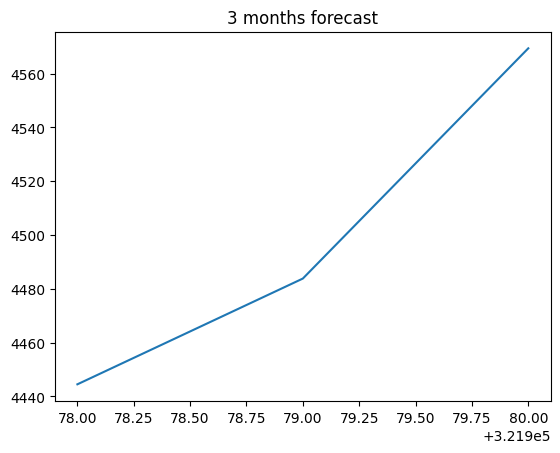

In [42]:
#predicting the next 3 months
arima_fit.forecast(3).plot()
plt.title('3 months forecast')

Behavior of Lags:

The first AR term (ar.L1) has the most influence, suggesting that recent observations strongly impact predictions. Similarly, the third MA term (ma.L3) has a strong negative effect, indicating that errors from three periods ago significantly influence the forecast.
The graph shows an upward trend which could indicate growth in sales over the next 3 months.

<ipython-input-44-da99e743255a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Anomaly"] = iso_forest.fit_predict(data_2[["TOTAL PRICE"]])


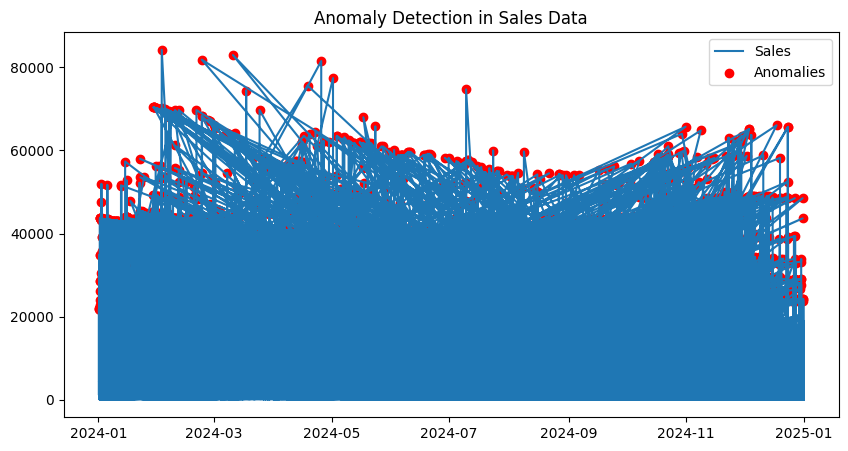

In [44]:
#Anomaly detection.
from sklearn.ensemble import IsolationForest
#set the date column as the index
data_2.set_index("DATE", inplace=True)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.02)  # 2% anomalies
data_2["Anomaly"] = iso_forest.fit_predict(data_2[["TOTAL PRICE"]])

# Visualize anomalies
plt.figure(figsize=(10,5))
plt.plot(data_2.index, data_2["TOTAL PRICE"], label="Sales")
plt.scatter(data_2.index[data_2["Anomaly"] == -1], data_2["TOTAL PRICE"][data_2["Anomaly"] == -1], color='red', label="Anomalies")
plt.legend()
plt.title("Anomaly Detection in Sales Data")
plt.show()

The scatter plot shows the TOTAL PRICE over time,with anomalies highlited in red. The anomalies could represent unusually high or low sale values that deviate from the typical sales pattern. Clustered anomaly points on specific times of the yea show could show sasonal patterns.

Text(0.5, 1.0, 'Correlation between Total Price and Quantity')

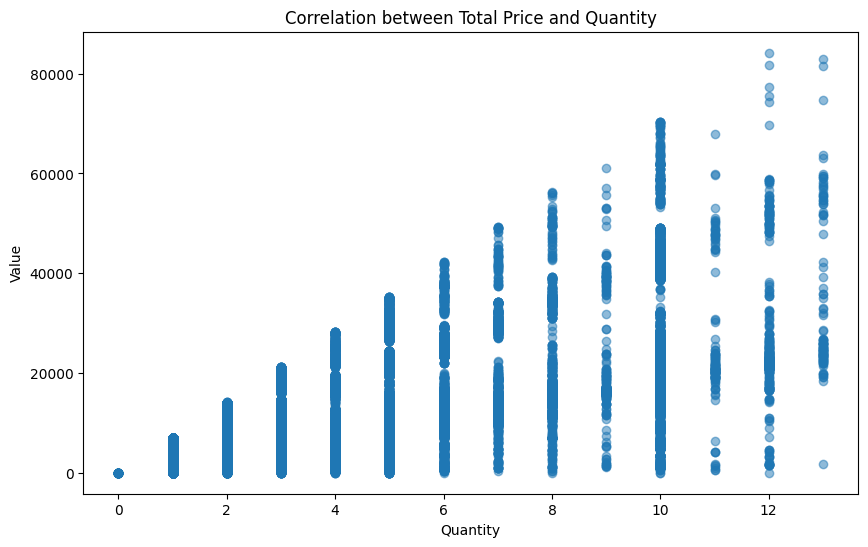

In [45]:
#correlation analysis between value and quantity where value is total price
plt.figure(figsize=(10, 6))
plt.scatter(data_2['QUANTITY'], data_2['TOTAL PRICE'],alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Correlation between Total Price and Quantity')

In [46]:
correlation = data_2['TOTAL PRICE'].corr(data_2['QUANTITY'])
print("Correlation between Total Price and Quantity:", correlation)

Correlation between Total Price and Quantity: 0.7626622516776266


From the graph above and the correlation results, it shows that there's a high correlation of 0.7627 between quantity and value i.e as the number of units sold increases then the value also increases.

**RECOMMENDATIONS.**

**1.** Based on the analysis, the top 5 products based on quantity and value should be more prioritized for marketing campaigns. They have a higher customer demand and business should stategize on their marketing campaigns to increase their revenue.

**2.** Based on the customer segmentation, businesses with low quantity, low value or low transactional frequenccies should implement startegies to re-engage their customers. They could conduct surveys to understand their business barriers, improve the awareness of the products they are selling and offer discounts and deals to thei customers.

**3.** For the top selling products, business shoud increase their inventory. For seasons where there's a sharp decrease or inccrease in sales, plan ahead accordingly to avoid supply chain delays. Business should implement strategies to maintain high/low stock levels or use fast/slow moving inventory strategies to fit the customer demand.

**LIMITATIONS**

**1.** Using a machine with a low memory prevents using more advanced machine learning techniques for predictive analysis to derive more insights.
